# Examen Parcial Cenca de datos 1

## Integrantes:  
- Quispe Cuadros Arthur
-
-
-
-

## 1. Introducción y justificación

En el presente documento se realziará un modelo de redes neronales para el precio de viviendas en Lima Perú.

## 2.Recolección y análisis exploratorio de datos

### Variables involucradas

### Qué se quiere predecir

###	Distribución de clases (si es clasificación) o rango de valores (si es regresión)

## 3. Preprocesamiento

#### Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Lectura de datos

In [2]:
df_casas = pd.read_csv('viviendas_lima_paginas_casas.csv')
df_departamentos = pd.read_csv('viviendas_lima_paginas_departamentos.csv')
df1 = pd.concat([df_casas, df_departamentos], ignore_index=True)
print(df1.shape)
print(df1.info())
df1.head()

(467, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  467 non-null    object 
 1   Precio               467 non-null    object 
 2   Referencia           467 non-null    object 
 3   Zona                 467 non-null    object 
 4   Disposición          462 non-null    object 
 5   M² edificados        458 non-null    object 
 6   M² del terreno       188 non-null    object 
 7   Dormitorios          458 non-null    float64
 8   Plantas              301 non-null    float64
 9   Barrio Privado       0 non-null      float64
 10  Acepta permuta       2 non-null      object 
 11  Tipo de Propiedad    467 non-null    object 
 12  Estado               459 non-null    object 
 13  Baños                463 non-null    float64
 14  M² de terraza        49 non-null     object 
 15  Año de Construcción  255 non-n

,URL,Precio,Referencia,Zona,Disposición,M² edificados,M² del terreno,Dormitorios,Plantas,Barrio Privado,Acepta permuta,Tipo de Propiedad,Estado,Baños,M² de terraza,Año de Construcción,Garajes,Sobre,Cuota inicial,Vivienda Social
0,https://www.infocasas.com.pe/vendo-casa-de-pla...,U$S 150.000,WFDBD0,Asia,No aplica,120 m2,130 m2,3.0,1.0,NaN,NaN,Casa,Excelente estado,2.0,NaN,NaN,NaN,No aplica,NaN,NaN
1,https://www.infocasas.com.pe/vendo-hermosa-cas...,U$S 150.000,P8DE95,Comas,Al frente,124 m2,250 m2,4.0,3.0,NaN,NaN,Casa,Buen estado,3.0,NaN,2012,NaN,Avenida,NaN,NaN
2,https://www.infocasas.com.pe/vendo-estupenda-c...,U$S 300.000,Q164FD,Pueblo Libre,Al frente,165 m2,217 m2,4.0,1.0,NaN,NaN,Casa,Buen estado,3.0,NaN,58,1.0,No aplica,NaN,NaN
3,https://www.infocasas.com.pe/vendo-casa-en-la-...,U$S 540.000,P8E1BB,La Molina,Al frente,450 m2,300 m2,4.0,3.0,NaN,NaN,Casa,Excelente estado,3.0,NaN,2022,1.0,No aplica,NaN,NaN
4,https://www.infocasas.com.pe/vendo-casa-292-m2...,U$S 560.000,JAC858,San Borja,Al frente,460 m2,291 m2,5.0,3.0,NaN,NaN,Casa,Buen estado,3.0,NaN,1974,2.0,No aplica,NaN,NaN


### Limpieza de datos (valores perdidos, duplicados)

In [3]:
# Valores faltantes (NA´S)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Shape:')
print(df1.shape)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Proporción de variables con NA:')
porcentaje_nulos = df1.isna().mean() 
columnas_con_muchos_nulos = porcentaje_nulos[porcentaje_nulos > 0.30]
print(porcentaje_nulos)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Variables con una proporcion de NA´s mayores a 0.30')
print(columnas_con_muchos_nulos)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape:
(467, 20)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Proporción de variables con NA:
URL                    0.000000
Precio                 0.000000
Referencia             0.000000
Zona                   0.000000
Disposición            0.010707
M² edificados          0.019272
M² del terreno         0.597430
Dormitorios            0.019272
Plantas                0.355460
Barrio Privado         1.000000
Acepta permuta         0.995717
Tipo de Propiedad      0.000000
Estado                 0.017131
Baños                  0.008565
M² de terraza          0.895075
Año de Construcción    0.453961
Garajes                0.216274
Sobre                  0.000000
Cuota inicial          1.000000
Vivienda Social        0.942184
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Variables con una proporcion de NA´s mayores a 0.30
M² del terreno         0.597430
Plantas                0.355460
Barrio Privado         1.000000
Acepta permuta         0.995717
M² de terraza 

In [4]:
# Revisamos la variable Diisposición
print(df1['Disposición'].value_counts(normalize=True)) # Mas de 75% tiene 'No aplica' por lo tanto lo retiramos
print("-----------------------------------------------------------")
# Revisamos la variable Estado
print(df1['Estado'].value_counts(normalize=True)) # Podemos juntar varias categorias en una sola
print("-----------------------------------------------------------")
# Revisamos la variable Estado
print(df1['Sobre'].value_counts(normalize=True)) # Mas de 75% tiene 'No aplica' por lo tanto lo retiramos
print("-----------------------------------------------------------")
print(df1['Tipo de Propiedad'].value_counts(normalize=True))

Disposición
No aplica       0.774892
Al frente       0.192641
Interior        0.023810
Lateral         0.004329
Contrafrente    0.004329
Name: proportion, dtype: float64
-----------------------------------------------------------
Estado
Buen estado               0.488017
Excelente estado          0.383442
A estrenar                0.080610
Requiere mantenimiento    0.030501
En construcción           0.008715
A reciclar                0.004357
Reciclada                 0.004357
Name: proportion, dtype: float64
-----------------------------------------------------------
Sobre
No aplica    0.890792
Otros        0.057816
Avenida      0.040685
Rambla       0.010707
Name: proportion, dtype: float64
-----------------------------------------------------------
Tipo de Propiedad
Casa            0.591006
Departamento    0.408994
Name: proportion, dtype: float64


In [5]:
# Eliminamos aquellas columnas con una proporción de NA's mayores al 45% y tambien el URL
df2 = df1.drop(columns=list(columnas_con_muchos_nulos.index) + ['URL']+['Referencia']+['Disposición']+
               ['Sobre'])

# Reemplazamos los valores NA de la columna Garaje por ceros
df2['Garajes'] = df2['Garajes'].fillna(0)

# Shape 
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Shape')
print(df2.shape)

# Cantidad de NA´s
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Cantidad de NA por columna')
print(df2.isna().sum())

# Eliminamos los registros con NA's
df2.dropna(inplace=True)

# Shape 
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Shape')
print(df2.shape)

# Info del df actual
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Info de df2')
print((df2.info()))


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape
(467, 8)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cantidad de NA por columna
Precio               0
Zona                 0
M² edificados        9
Dormitorios          9
Tipo de Propiedad    0
Estado               8
Baños                4
Garajes              0
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape
(442, 8)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Info de df2
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 466
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Precio             442 non-null    object 
 1   Zona               442 non-null    object 
 2   M² edificados      442 non-null    object 
 3   Dormitorios        442 non-null    float64
 4   Tipo de Propiedad  442 non-null    object 
 5   Estado             442 non-null    object 
 6   Baños              442 non-null    float64
 7   Garajes            442 non-null    float64
dtypes: float64(3),

In [6]:
# Convertir variables objecct a numericas
print(df2.head(2))
#['Precio','M² edificados',]

# Limpiar 'Precio': elimina U$S, comas, puntos, espacios, etc.
df2['Precio'] = df2['Precio'].str.replace(r'[^\d]', '', regex=True).astype(float)


# Extraer solo los dígitos iniciales (antes del " m²", "m2", etc.)
df2['M² edificados'] = df2['M² edificados'].str.extract(r'^(\d+)')[0].astype(float)

print(df2.info())
df2.head(2)


        Precio   Zona M² edificados  Dormitorios Tipo de Propiedad  \
0  U$S 150.000   Asia        120 m2          3.0              Casa   
1  U$S 150.000  Comas        124 m2          4.0              Casa   

             Estado  Baños  Garajes  
0  Excelente estado    2.0      0.0  
1       Buen estado    3.0      0.0  
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 466
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Precio             442 non-null    float64
 1   Zona               442 non-null    object 
 2   M² edificados      442 non-null    float64
 3   Dormitorios        442 non-null    float64
 4   Tipo de Propiedad  442 non-null    object 
 5   Estado             442 non-null    object 
 6   Baños              442 non-null    float64
 7   Garajes            442 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.1+ KB
None


,Precio,Zona,M² edificados,Dormitorios,Tipo de Propiedad,Estado,Baños,Garajes
0,150000.0,Asia,120.0,3.0,Casa,Excelente estado,2.0,0.0
1,150000.0,Comas,124.0,4.0,Casa,Buen estado,3.0,0.0


In [7]:
# Ordenamos las columnas
df3 = df2[['Dormitorios','Baños','Garajes','M² edificados',
          'Zona', 'Tipo de Propiedad', 'Estado','Precio']]

print(df3.info())
df3.head()


<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 466
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dormitorios        442 non-null    float64
 1   Baños              442 non-null    float64
 2   Garajes            442 non-null    float64
 3   M² edificados      442 non-null    float64
 4   Zona               442 non-null    object 
 5   Tipo de Propiedad  442 non-null    object 
 6   Estado             442 non-null    object 
 7   Precio             442 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.1+ KB
None


,Dormitorios,Baños,Garajes,M² edificados,Zona,Tipo de Propiedad,Estado,Precio
0,3.0,2.0,0.0,120.0,Asia,Casa,Excelente estado,150000.0
1,4.0,3.0,0.0,124.0,Comas,Casa,Buen estado,150000.0
2,4.0,3.0,1.0,165.0,Pueblo Libre,Casa,Buen estado,300000.0
3,4.0,3.0,1.0,450.0,La Molina,Casa,Excelente estado,540000.0
4,5.0,3.0,2.0,460.0,San Borja,Casa,Buen estado,560000.0


###	Escalamiento / normalización

Zona
La Molina                 83
Santiago De Surco         72
Miraflores                65
San Borja                 23
San Isidro                22
Cercado De Lima           16
Chorrillos                15
San Miguel                11
Surquillo                 11
Los Olivos                 9
Magdalena Del Mar          8
Jesus Maria                8
Asia                       7
Pueblo Libre               7
San Martin De Porres       7
Barranco                   6
Comas                      5
Lince                      5
San Juan De Miraflores     5
Lima Cercado               5
Cerro Azul                 5
Callao                     4
Carabayllo                 3
Ate Vitarte                3
San Juan De Lurigancho     3
Santa Maria Del Mar        2
Villa El Salvador          2
Punta Hermosa              2
Punta Negra                2
Cañete                     2
Chosica                    2
Cercado del Callao         2
Chaclacayo                 2
Lurin                      2
Mala     

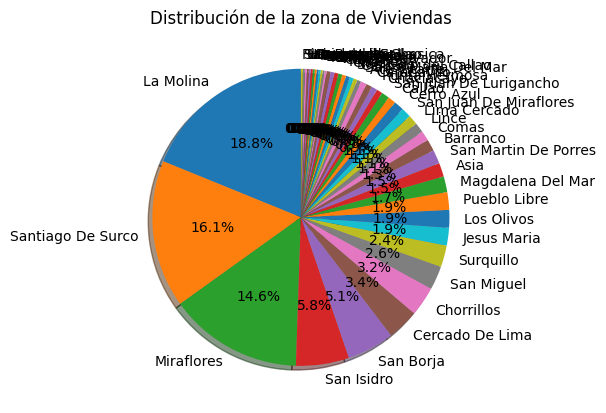

In [8]:
# Alta dimensionalidad con pocos datos
print(df3.value_counts(subset='Zona'))

# Calcular proporción por categoría
zona_prop = df1['Zona'].value_counts(normalize=True)

# Graficar como pie chart
plt.figure(figsize=(6, 6))
zona_prop.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribución de la zona de Viviendas')
plt.ylabel('')
plt.tight_layout()
plt.show()


Para evitar una explosión de dimensionalidad al aplicar codificación One-Hot se creó una nueva variable Zona_macro agrupando los distritos de Lima Metropolitana en macrozonas geográficas: Lima Norte, Sur, Este, Centro, Callao y Otros.

In [19]:

zona_macro = {
    # Lima Centro
    'Miraflores': 'Lima Centro',
    'San Isidro': 'Lima Centro',
    'San Borja': 'Lima Centro',
    'La Molina': 'Lima Centro',
    'Lince': 'Lima Centro',
    'Jesus Maria': 'Lima Centro',
    'Magdalena Del Mar': 'Lima Centro',
    'Pueblo Libre': 'Lima Centro',
    'Breña': 'Lima Centro',
    'Rimac': 'Lima Centro',
    'San Luis': 'Lima Centro',
    'Lima Cercado': 'Lima Centro',
    'Cercado De Lima': 'Lima Centro',
    'La Victoria': 'Lima Centro',
    'San Miguel': 'Lima Centro',
    'Surquillo': 'Lima Centro',
    'Barranco': 'Lima Centro',

    # Lima Norte
    'Los Olivos': 'Lima Norte',
    'San Martin De Porres': 'Lima Norte',
    'Comas': 'Lima Norte',
    'Carabayllo': 'Lima Norte',
    'Puente Piedra': 'Lima Norte',

    # Lima Este
    'Ate': 'Lima Este',
    'Ate Vitarte': 'Lima Este',
    'Santa Anita': 'Lima Este',
    'San Juan De Lurigancho': 'Lima Este',
    'Chosica': 'Lima Este',
    'Chaclacayo': 'Lima Este',
    'Cieneguilla': 'Lima Este',
    'Lurigancho Chosica': 'Lima Este',

    # Lima Sur
    'Santiago De Surco': 'Lima Sur',
    'San Juan De Miraflores': 'Lima Sur',
    'Villa El Salvador': 'Lima Sur',
    'Chorrillos': 'Lima Sur',
    'Lurin': 'Lima Sur',
    'Pucusana': 'Lima Sur',
    'San Bartolo': 'Lima Sur',
    'Santa Maria Del Mar': 'Lima Sur',
    'Mala': 'Lima Sur',
    'Punta Hermosa': 'Lima Sur',
    'Punta Negra': 'Lima Sur',

    # Callao y Otros
    'Callao': 'Callao',
    'Cercado del Callao': 'Callao',
    'Cercado Callao': 'Callao',
    'Asia': 'Otros',
    'Huacho': 'Otros',
    'Huaral': 'Otros',
    'Cañete': 'Otros',
    'Cerro Azul': 'Otros'
}

# Insertamos la variable zona_macro
df3['Zona_macro'] = df3['Zona'].map(zona_macro).fillna('Otros') 

# Contamos los valores de las macrozonas
print(df3.value_counts(subset='Zona_macro')) 

df3.groupby(['Zona_macro', 'Zona'])['Precio'].std().sort_values(ascending=False)


Zona_macro
Lima Centro    274
Lima Sur       106
Lima Norte      25
Otros           16
Lima Este       14
Callao           7
Name: count, dtype: int64


C:\Users\arthu\AppData\Local\Temp\ipykernel_22508\3966536627.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Zona_macro'] = df3['Zona'].map(zona_macro).fillna('Otros')


Zona_macro   Zona                  
Lima Centro  Jesus Maria               2.283789e+06
             San Isidro                2.112929e+06
             Lima Cercado              2.035883e+06
Lima Sur     Santiago De Surco         1.493749e+06
Lima Centro  La Molina                 1.159974e+06
Otros        Asia                      1.063655e+06
Lima Sur     Chorrillos                8.449737e+05
             Lurin                     8.114050e+05
             Santa Maria Del Mar       8.061017e+05
Lima Centro  San Borja                 7.925202e+05
Lima Este    Ate Vitarte               5.561634e+05
Lima Sur     Mala                      5.303301e+05
Lima Centro  Pueblo Libre              5.139167e+05
             Miraflores                5.121270e+05
             Lince                     4.900637e+05
Callao       Callao                    4.859145e+05
Otros        Cerro Azul                4.206186e+05
Lima Centro  Barranco                  3.412493e+05
Lima Este    San Juan De Lur

In [ ]:
# Eliminamos la columna zona
df3.drop(columns='Zona',inplace=True) 

# Contamos la proporción de las macrozonas
zona_macro_prop = df3['Zona_macro'].value_counts(normalize=True)

# Graficar como pie chart
plt.figure(figsize=(6, 6))
zona_macro_prop.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribución de la zona de Viviendas')
plt.ylabel('')
plt.tight_layout()
plt.show()

###	Codificación de variables categóricas (Evitando explosión de dimensionalidad)

In [10]:
# Reubicamos las columnas ara uuuna mejor visualización
df3 = df3[['Dormitorios',
 'Baños',
 'Garajes',
 'M² edificados',
 'Tipo de Propiedad',
 'Estado',
 'Zona_macro',
 'Precio',
 ]]
df3.head()

,Dormitorios,Baños,Garajes,M² edificados,Tipo de Propiedad,Estado,Zona_macro,Precio
0,3.0,2.0,0.0,120.0,Casa,Excelente estado,Otros,150000.0
1,4.0,3.0,0.0,124.0,Casa,Buen estado,Lima Norte,150000.0
2,4.0,3.0,1.0,165.0,Casa,Buen estado,Lima Centro,300000.0
3,4.0,3.0,1.0,450.0,Casa,Excelente estado,Lima Centro,540000.0
4,5.0,3.0,2.0,460.0,Casa,Buen estado,Lima Centro,560000.0


Estado
Buen estado               0.472851
Excelente estado          0.393665
A estrenar                0.083710
Requiere mantenimiento    0.031674
En construcción           0.009050
A reciclar                0.004525
Reciclada                 0.004525
Name: proportion, dtype: float64


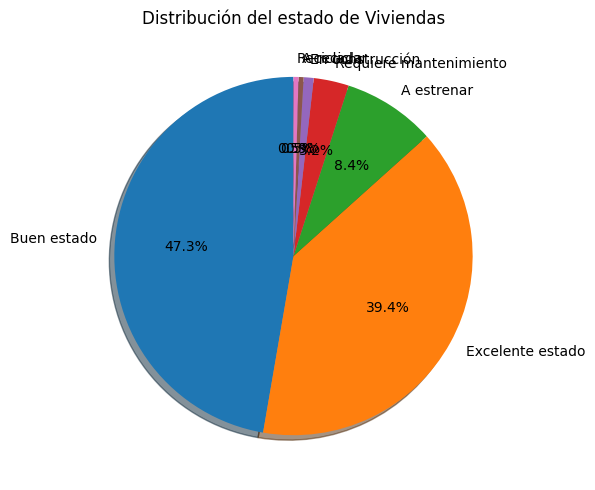

In [11]:
print(df3['Estado'].value_counts(normalize=True)) # Podemos juntar varias categorias en una sola

# Calcular proporción por categoría
estado_prop = df3['Estado'].value_counts(normalize=True)

# Graficar como pie chart
plt.figure(figsize=(6, 6))
estado_prop.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribución del estado de Viviendas')
plt.ylabel('')
plt.tight_layout()
plt.show()


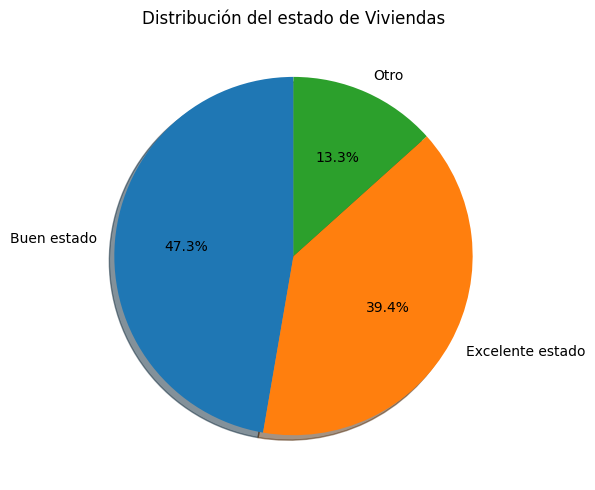

In [12]:
# Definir las categorías principales que quieres conservar
principales = ['Buen estado', 'Excelente estado']

# Reemplazar las demás por 'Otros'
df3['Estado'] = df3['Estado'].apply(lambda x: x if x in principales else 'Otro')

# Calcular proporción por categoría
estado_prop = df3['Estado'].value_counts(normalize=True)

# Graficar como pie chart
plt.figure(figsize=(6, 6))
estado_prop.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribución del estado de Viviendas')
plt.ylabel('')
plt.tight_layout()
plt.show()
 

In [13]:
df3.describe() # Se visualiza un area igual a 1 m2 , probablemente un error de tipeo
# por lo tanto se procede a quedarse solo con aquellas viviendas mayores a 20m2
# que es el area de un minidepartamento

,Dormitorios,Baños,Garajes,M² edificados,Precio
count,442.000000,442.000000,442.000000,442.000000,4.420000e+02
mean,3.803167,2.617647,1.617647,230.022624,8.229863e+05
std,1.098211,0.635999,1.342133,148.479762,1.126130e+06
min,1.000000,1.000000,0.000000,1.000000,4.800000e+04
25%,3.000000,2.000000,1.000000,110.250000,2.500000e+05
50%,4.000000,3.000000,2.000000,200.000000,5.400000e+05
75%,5.000000,3.000000,2.000000,300.000000,8.663875e+05
max,5.000000,3.000000,10.000000,910.000000,1.036000e+07


In [14]:
df4 = df3[df3['M² edificados']>20]
print(df4.shape,'\n')
print(df4.describe(),'\n')
print(df4.info())    

(434, 8) 

       Dormitorios       Baños     Garajes  M² edificados        Precio
count   434.000000  434.000000  434.000000     434.000000  4.340000e+02
mean      3.797235    2.615207    1.564516     234.205069  7.824481e+05
std       1.100238    0.635260    1.242710     146.575606  1.035095e+06
min       1.000000    1.000000    0.000000      26.000000  4.800000e+04
25%       3.000000    2.000000    1.000000     113.750000  2.500000e+05
50%       4.000000    3.000000    2.000000     200.000000  5.400000e+05
75%       5.000000    3.000000    2.000000     300.000000  8.500000e+05
max       5.000000    3.000000    9.000000     910.000000  1.036000e+07 

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 0 to 466
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dormitorios        434 non-null    float64
 1   Baños              434 non-null    float64
 2   Garajes            434 non-null    float64


In [15]:
# Data frame listo
df4

,Dormitorios,Baños,Garajes,M² edificados,Tipo de Propiedad,Estado,Zona_macro,Precio
0,3.0,2.0,0.0,120.0,Casa,Excelente estado,Otros,150000.0
1,4.0,3.0,0.0,124.0,Casa,Buen estado,Lima Norte,150000.0
2,4.0,3.0,1.0,165.0,Casa,Buen estado,Lima Centro,300000.0
3,4.0,3.0,1.0,450.0,Casa,Excelente estado,Lima Centro,540000.0
4,5.0,3.0,2.0,460.0,Casa,Buen estado,Lima Centro,560000.0
...,...,...,...,...,...,...,...,...
462,2.0,2.0,1.0,75.0,Departamento,Otro,Lima Sur,133000.0
463,3.0,2.0,1.0,128.0,Departamento,Excelente estado,Lima Centro,155000.0
464,3.0,3.0,2.0,342.0,Departamento,Excelente estado,Lima Sur,440000.0
465,2.0,2.0,1.0,72.0,Departamento,Excelente estado,Lima Centro,178000.0


### Análisis exploratorio

Text(0.5, 0, 'precio')

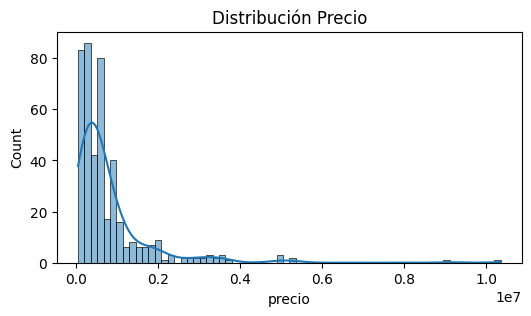

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución variable respuesta
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df4, x='Precio', kde=True,ax=ax)
ax.set_title("Distribución del Precio")
ax.set_xlabel('precio')

<Axes: ylabel='Precio'>

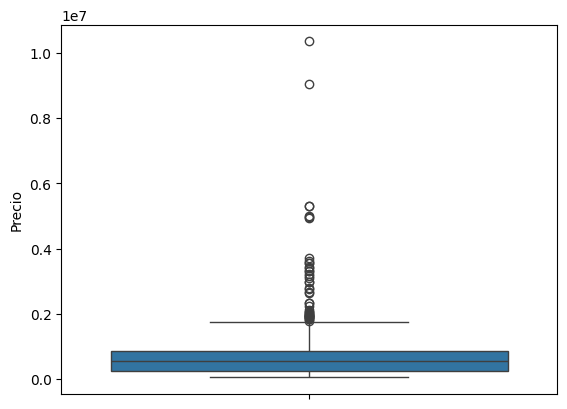

In [24]:
sns.boxplot(data=df4['Precio'])

Text(0.5, 0.98, 'Distribución variables numéricas')

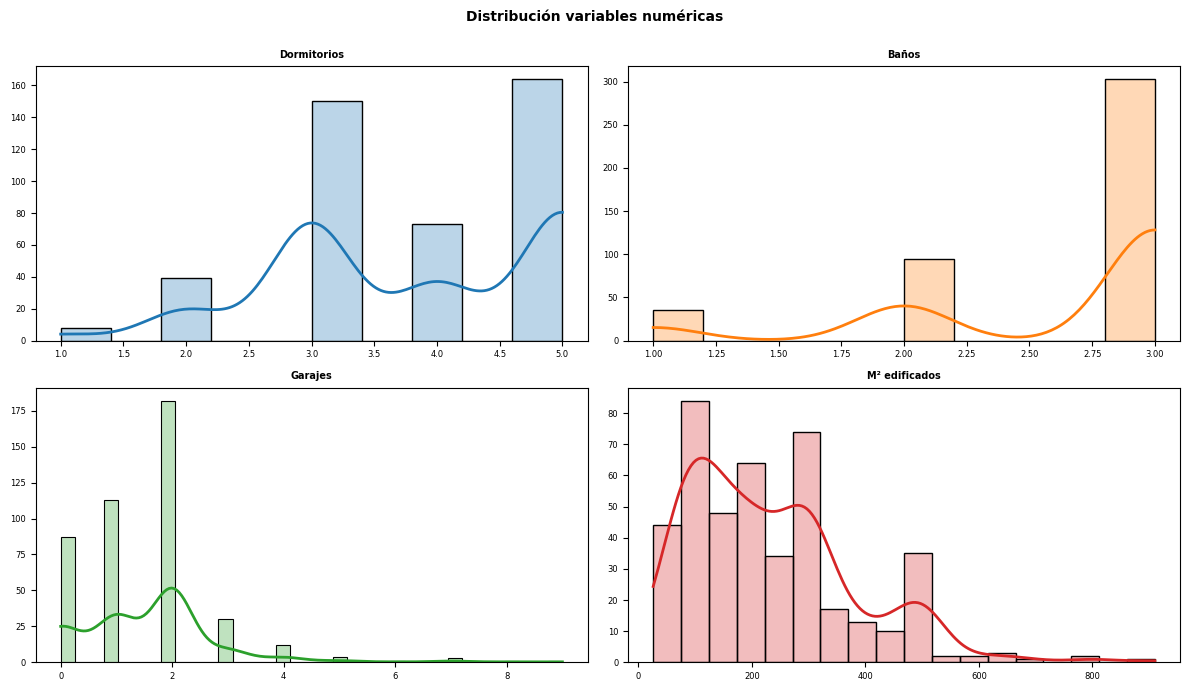

In [17]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
axes = axes.flat
columnas_numeric = df4.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df4,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

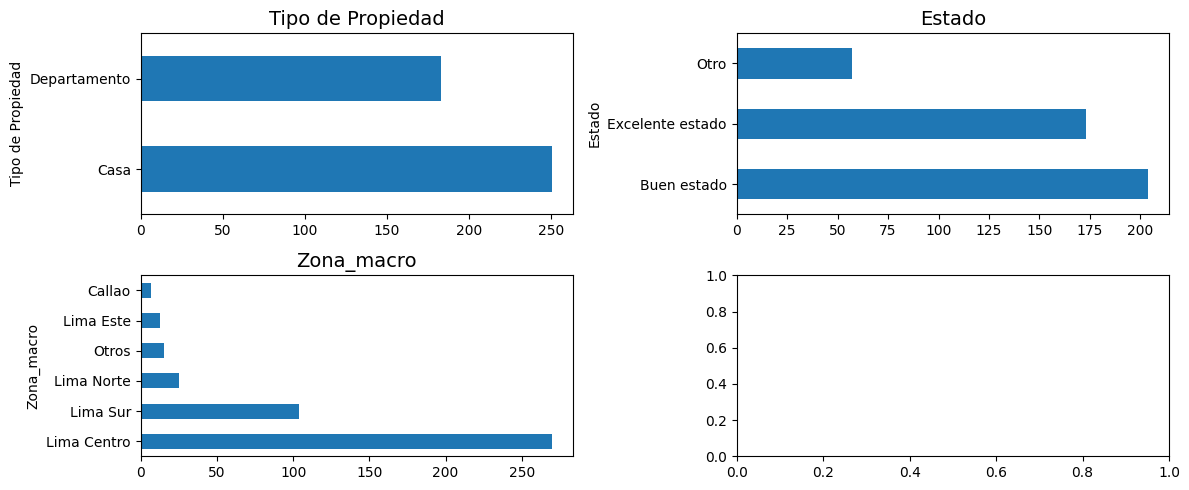

In [18]:
# Gráfico para cada variable cualitativa
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))
axes = axes.flat
columnas_object = df4.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df4[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")

fig.tight_layout()

In [ ]:
# df4.to_csv('Precio_viviendas_lima_peru_by_AQC.csv') # Para guardar
df4.shape

###	División del dataset en entrenamiento, validación y prueba

In [ ]:
X = df4.drop('Precio',axis=1)
y = df4['Precio']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split( X, np.ravel(y),
                                    test_size = 0.70, random_state = 100) 

### Codificación de variables categóricas (OneHot, LabelEncoder)

In [20]:
col_cat=df4.select_dtypes(include=['object', 'category']).columns.tolist()
print(col_cat)
for col in col_cat:
    print("-----------------------------------------------------------")
    print(f"Distribución de '{col}':")
    print(df4[col].value_counts(normalize=True).round(3))

['Tipo de Propiedad', 'Estado', 'Zona_macro']
-----------------------------------------------------------
Distribución de 'Tipo de Propiedad':
Tipo de Propiedad
Casa            0.578
Departamento    0.422
Name: proportion, dtype: float64
-----------------------------------------------------------
Distribución de 'Estado':
Estado
Buen estado         0.470
Excelente estado    0.399
Otro                0.131
Name: proportion, dtype: float64
-----------------------------------------------------------
Distribución de 'Zona_macro':
Zona_macro
Lima Centro    0.622
Lima Sur       0.240
Lima Norte     0.058
Otros          0.035
Lima Este      0.030
Callao         0.016
Name: proportion, dtype: float64


In [21]:
df4

,Dormitorios,Baños,Garajes,M² edificados,Tipo de Propiedad,Estado,Zona_macro,Precio
0,3.0,2.0,0.0,120.0,Casa,Excelente estado,Otros,150000.0
1,4.0,3.0,0.0,124.0,Casa,Buen estado,Lima Norte,150000.0
2,4.0,3.0,1.0,165.0,Casa,Buen estado,Lima Centro,300000.0
3,4.0,3.0,1.0,450.0,Casa,Excelente estado,Lima Centro,540000.0
4,5.0,3.0,2.0,460.0,Casa,Buen estado,Lima Centro,560000.0
...,...,...,...,...,...,...,...,...
462,2.0,2.0,1.0,75.0,Departamento,Otro,Lima Sur,133000.0
463,3.0,2.0,1.0,128.0,Departamento,Excelente estado,Lima Centro,155000.0
464,3.0,3.0,2.0,342.0,Departamento,Excelente estado,Lima Sur,440000.0
465,2.0,2.0,1.0,72.0,Departamento,Excelente estado,Lima Centro,178000.0
